In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

X_train = pd.read_csv('preprocessed_train_data.csv')
Y_train = pd.read_csv('preprocessed_train_label.csv')
X_test = pd.read_csv('preprocessed_test_data.csv')
Y_test = pd.read_csv('preprocessed_test_label.csv')


X_train, _ = train_test_split(X_train, test_size=0.9, random_state=42, stratify=X_train['Class Index'])
X_test, _ = train_test_split(X_test, test_size=0.9, random_state=42, stratify=X_test['Class Index'])


import ast
import re

def clean_text(row):
  letters = ast.literal_eval(row)
  text = "".join(letters)

  return text

X_train['recombined text'] = X_train['text'].apply(clean_text)
X_test['recombined text'] = X_test['text'].apply(clean_text)


In [6]:
X_train

,Unnamed: 0,Class Index,text,recombined text
13786,13786,3,"['p', 'r', 'o', 'b', 'l', 'e', 'm', 's', ' ', ...",problems found in auditing industry washingto...
57198,57198,3,"['f', 'i', 'r', 'e', 'w', 'o', 'r', 'k', 's', ...",fireworks in space nasa released this image of...
24971,24971,1,"['2', '1', ' ', 's', 'h', 'o', 't', ' ', 'd', ...","21 shot dead in iraq police station massacre, ..."
28717,28717,4,"['v', 'i', 'r', 'g', 'i', 'n', ' ', 't', 'o', ...","virgin to offer space flights (even, sort of, ..."
32820,32820,4,"['y', 'a', 'h', 'o', 'o', '!', ' ', 'b', 'u', ...","yahoo! building desktop search, more personali..."
...,...,...,...,...
2779,2779,4,"['t', 'r', 'o', 'j', 'a', 'n', ' ', 'i', 'n', ...",trojan invades russian mobiles a trojan horse ...
19763,19763,4,"['h', 'e', 'a', 'l', 't', 'h', 'c', 'a', 'r', ...",healthcare is different the u.s. president ha...
39922,39922,4,"['r', 'e', 'v', 'i', 'e', 'w', ':', ' ', 'h', ...",review: hi-def tv may be pcs' killer app (ap) ...
58830,58830,4,"['s', 'h', 'a', 'r', 'p', ' ', 'n', 'e', 't', ...",sharp net profit up 40 percent in first half o...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(max_features = 10000, stop_words = 'english', ngram_range = (1,2))
X_train_vec = vectoriser.fit_transform(X_train['recombined text'])
X_test_vec = vectoriser.transform(X_test['recombined text'])

In [8]:
#X_test_vec = X_test_vec.toarray()
X_train_vec = X_train_vec.toarray()

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_vec)

In [10]:
pip install kmodes


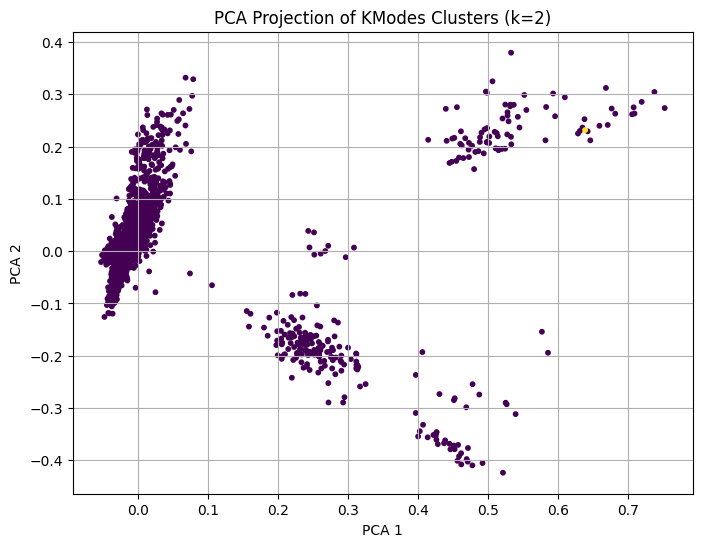

Silhouette score: -0.00592680671844872


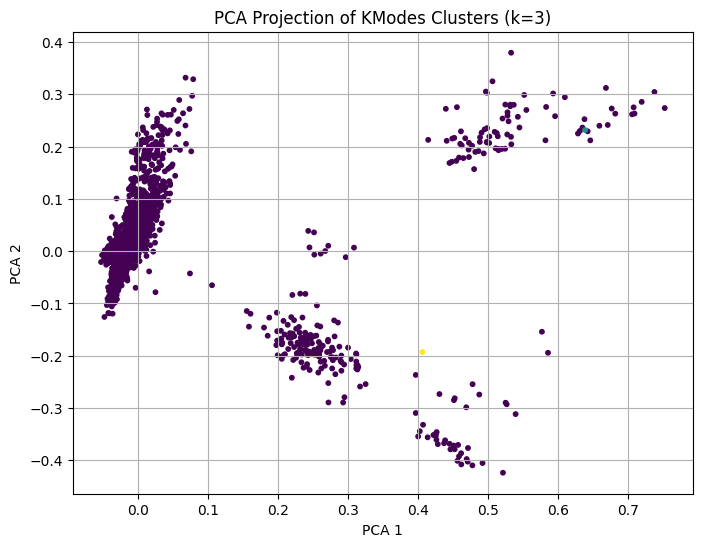

Silhouette score: -0.009385580197078539


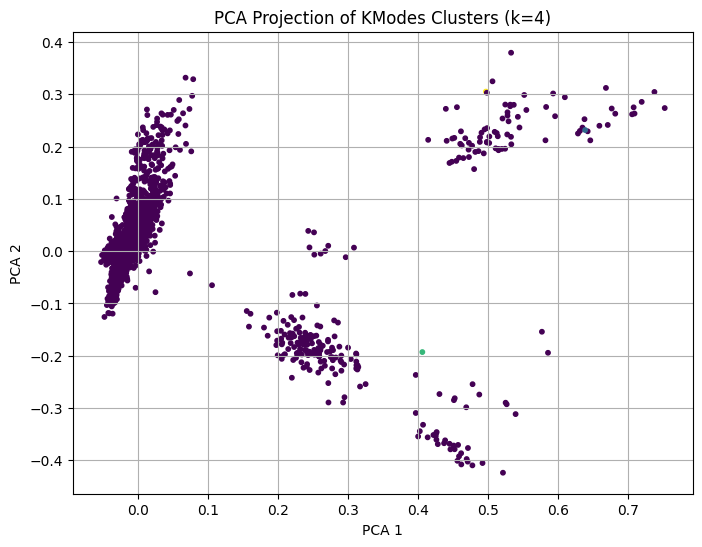

Silhouette score: -0.011830621182499564


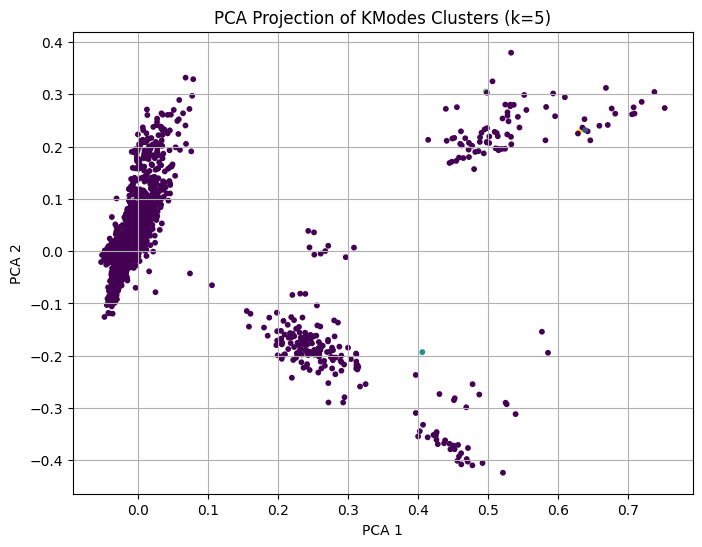

Silhouette score: -0.012219845947236548


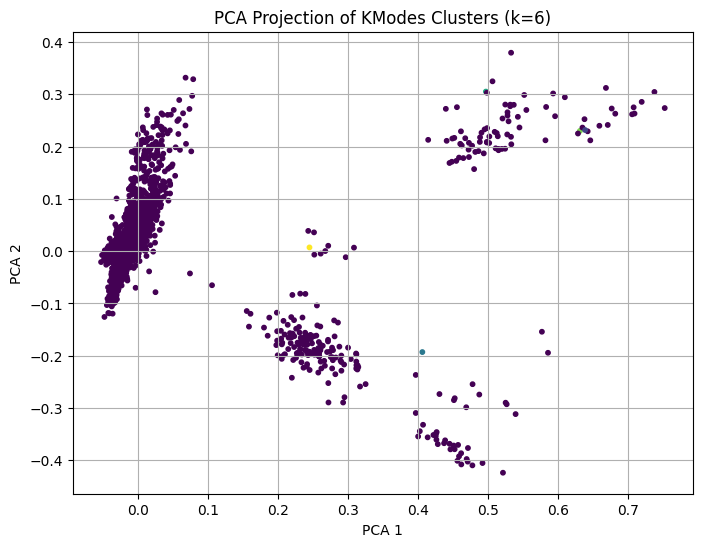

Silhouette score: -0.013728751363145787


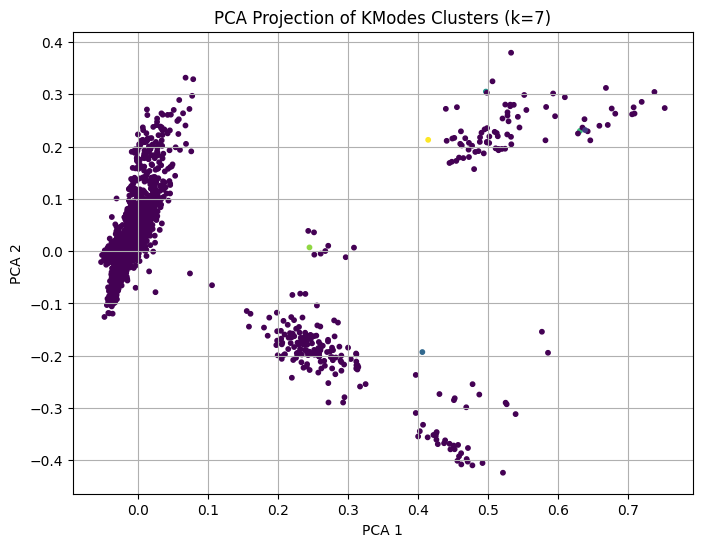

Silhouette score: -0.014548586608017963


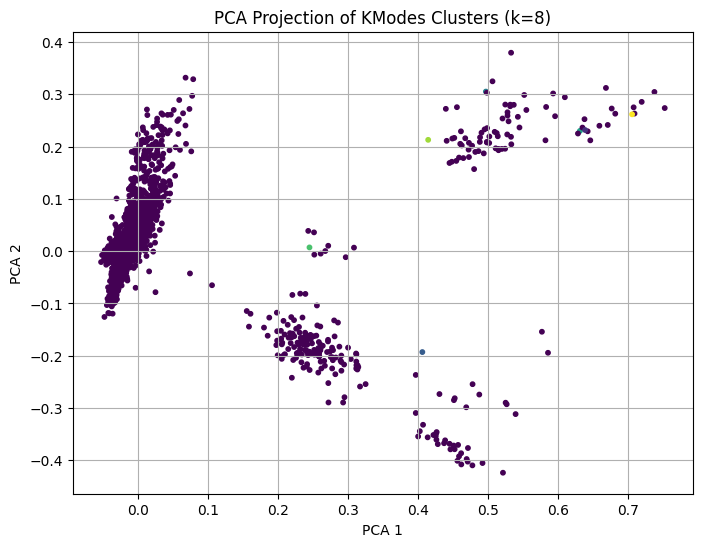

Silhouette score: -0.015296885802338015


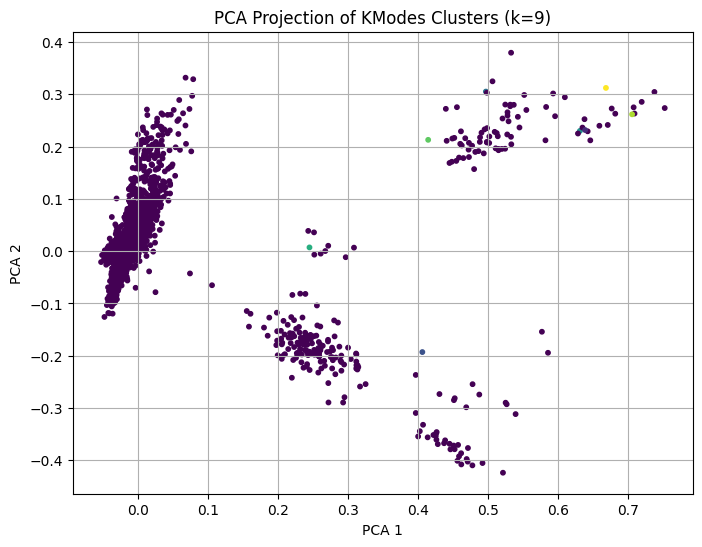

Silhouette score: -0.015670367485874883


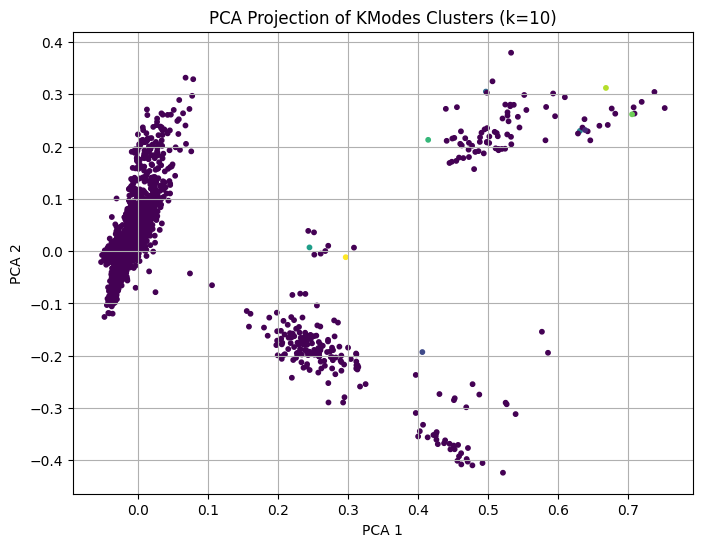

Silhouette score: -0.016558209239842588


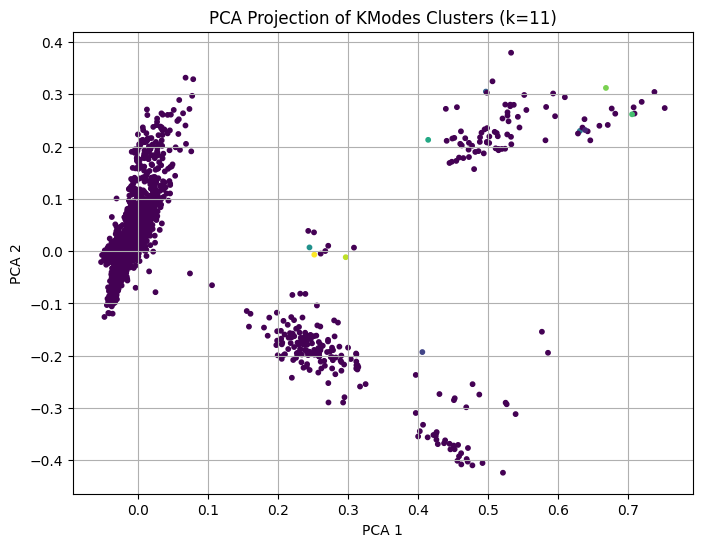

Silhouette score: -0.017514397052509102


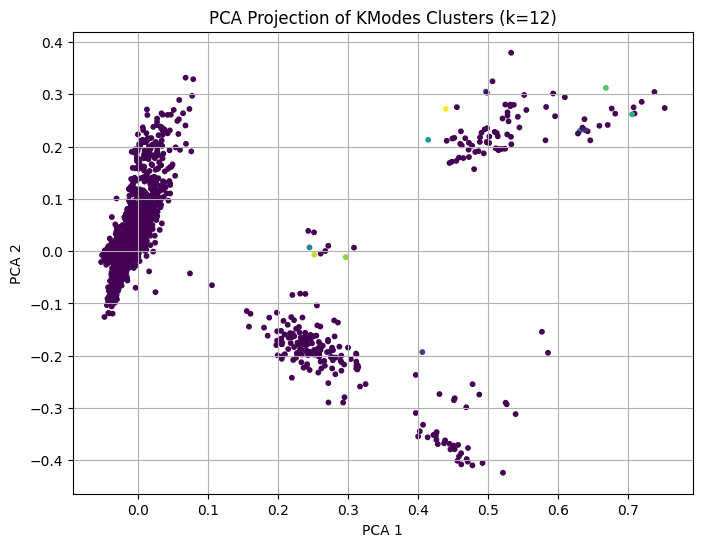

Silhouette score: -0.018089982367535618


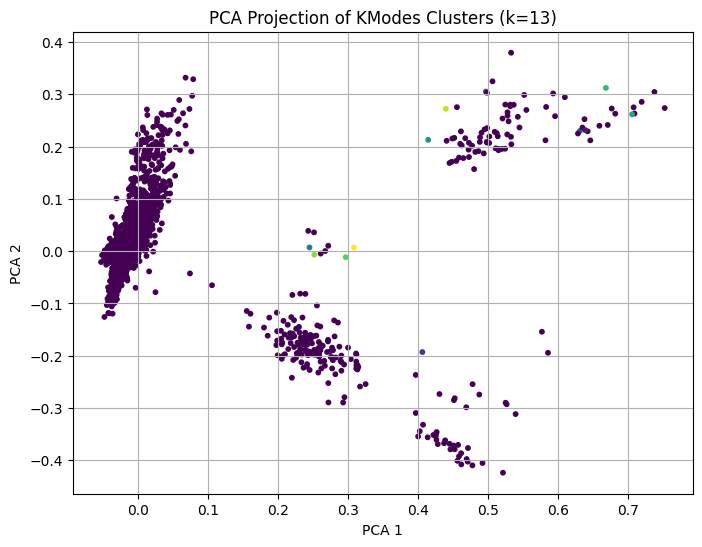

Silhouette score: -0.018258094042879282


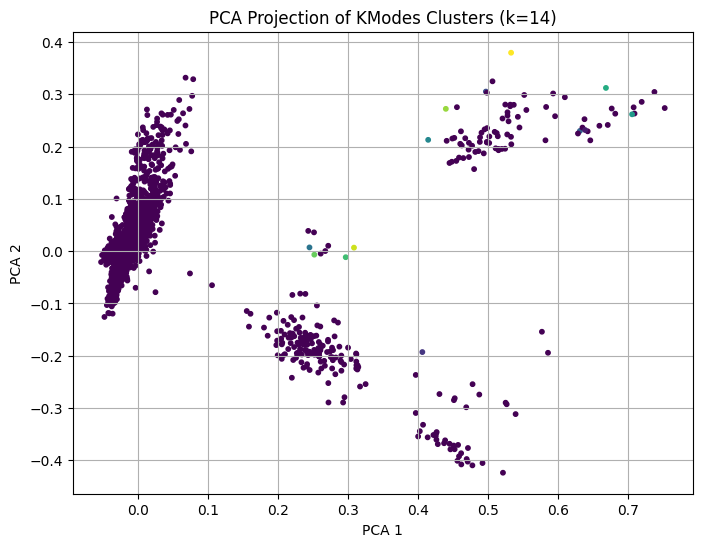

Silhouette score: -0.01957655798214231


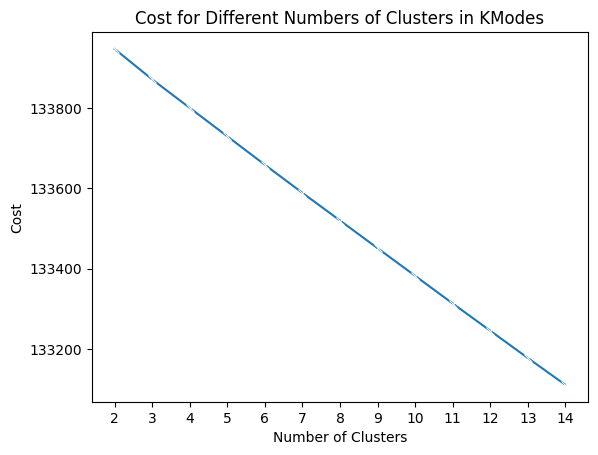

In [12]:
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

costs = []
k_range = range(2, 15)

for k in k_range:
    km = KModes(n_clusters=k, verbose=0)
    clusters = km.fit_predict(X_train_vec)
    costs.append(km.cost_)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis', s=10)
    plt.title(f"PCA Projection of KModes Clusters (k={k})")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()

    print('Silhouette score:', silhouette_score(X_train_vec, clusters, metric='euclidean'))

sns.lineplot(x=list(k_range), y=costs, marker='x')
plt.xticks(list(k_range))
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Cost for Different Numbers of Clusters in KModes')
plt.show()
